In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

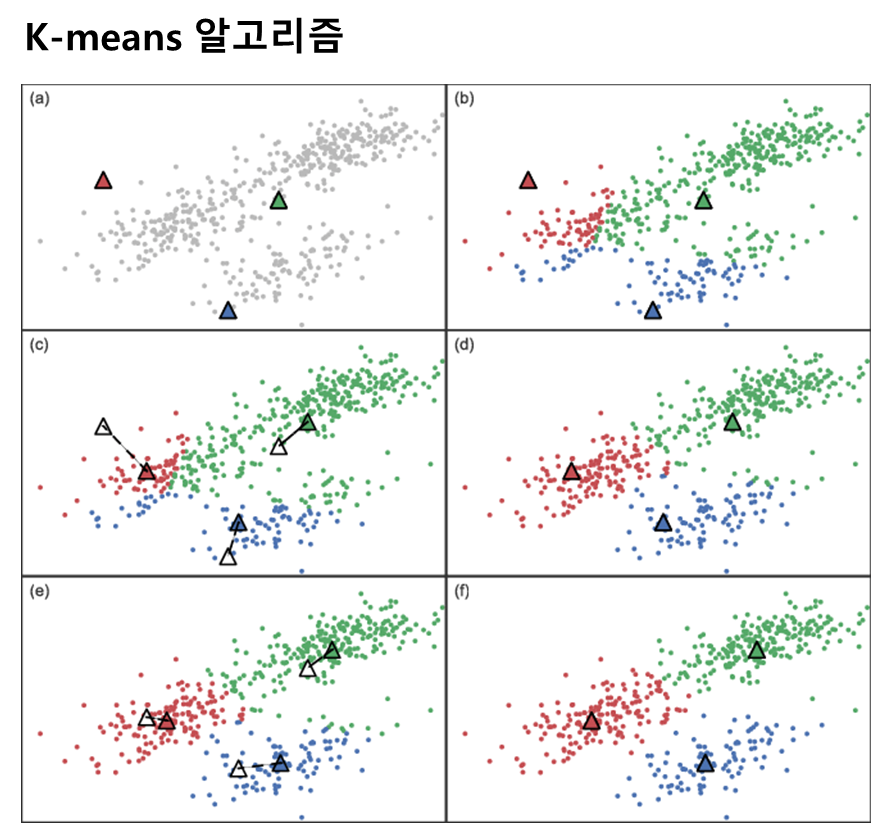

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=66dd8ac92f781" -O "songpa.txt"

In [ ]:
data = pd.read_csv('songpa.txt', sep=',')
data.shape

In [ ]:
figx = 10
figy = (data['y'].max() - data['y'].min()) / (data['x'].max() - data['x'].min()) * figx

plt.figure(figsize=(figx,figy))
plt.scatter(x=data['x'], y=data['y'], s=2)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans #kmeans
from scipy.spatial.distance import cdist

# ... (previous code remains the same)

# KMeans clustering with 10 iterations
kmeans = KMeans(n_clusters=10, max_iter=10, random_state=0)
kmeans.fit(data[['x', 'y']])

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the dataframe
data['cluster'] = labels

# Plot the data with different colors for each cluster
plt.figure(figsize=(figx,figy))
for i in range(10):
  cluster_data = data[data['cluster'] == i]
  plt.scatter(x=cluster_data['x'], y=cluster_data['y'], s=2, label=f'Cluster {i}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c=range(10))

plt.xlabel('x')
plt.ylabel('y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


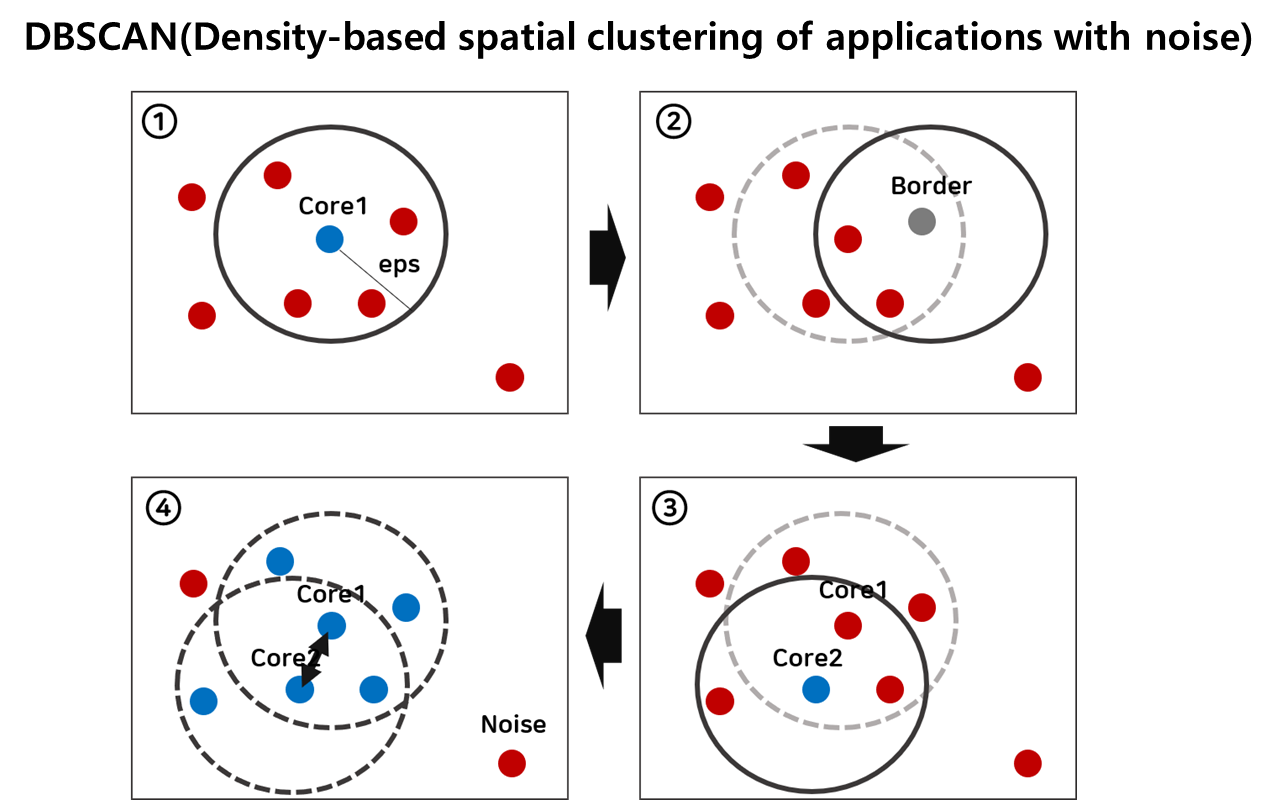

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=50, min_samples=10)
clusters = dbscan.fit_predict(data[['x', 'y']])

plt.figure(figsize=(figx, figy))
unique_labels = set(clusters)
for k in unique_labels:
    class_member_mask = (clusters == k)
    xy = data[['x', 'y']][class_member_mask]
    plt.scatter(xy['x'], xy['y'], s=2)

plt.show()


In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=66dd0aa51d289" -O "apt_real.csv"

In [ ]:
data = pd.read_csv('apt_real.csv', quotechar='"', sep=',', skiprows=15, encoding='cp949', dtype='str')
data.shape

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',', '')
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')
data = data.rename(columns={'거래금액(만원)' : '거래가'})
data = data[data['거래가'] < 500000]

data = data.rename(columns={'전용면적(㎡)':'면적'})
data['면적'] = data['면적'].astype('float')

data['건축년도'] = data['건축년도'].astype(int)
data['연한'] = data['건축년도'].apply(lambda x : 2024 - x)

data.dtypes

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data['면적'].values, data['연한'].values, s=2, alpha=0.2)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans #kmeans
from scipy.spatial.distance import cdist

# ... (previous code remains the same)

# KMeans clustering with 10 iterations
kmeans = KMeans(n_clusters=10, max_iter=10, random_state=0)
kmeans.fit(data[['면적', '연한']])

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the dataframe
data['cluster'] = labels

# Plot the data with different colors for each cluster
plt.figure(figsize=(10,10))
for i in range(10):
  cluster_data = data[data['cluster'] == i]
  plt.scatter(x=cluster_data['면적'], y=cluster_data['연한'], s=2, label=f'Cluster {i}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c=range(10))

plt.xlabel('x')
plt.ylabel('y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=2, min_samples=10)
clusters = dbscan.fit_predict(data[['면적', '연한']])

plt.figure(figsize=(figx, figy))
unique_labels = set(clusters)
for k in unique_labels:
    class_member_mask = (clusters == k)
    xy = data[['면적', '연한']][class_member_mask]
    plt.scatter(xy['면적'], xy['연한'], s=2)

plt.show()
